In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45231 entries, 0 to 45230
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45231 non-null  int64 
 1   headline    45231 non-null  object
 2   url         45231 non-null  object
 3   publisher   45231 non-null  object
 4   date        45231 non-null  object
 5   stock       45231 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [4]:
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [5]:
data.stock.unique()

array(['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI',
       'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB',
       'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO',
       'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD',
       'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO',
       'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH',
       'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB',
       'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT',
       'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX',
       'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE',
       'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP',
       'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT',
       'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE',
       'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI',
      

In [7]:
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [8]:
data.head(3)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A


## Descriptive Statistics and Time Series Analysis

In [9]:
# headline length
data['headline_length'] = data['headline'].str.len()


In [10]:
summary = data['headline_length'].describe()
print(summary)

count    45231.000000
mean        73.613517
std         40.715884
min          7.000000
25%         47.000000
50%         65.000000
75%         88.000000
max        458.000000
Name: headline_length, dtype: float64


In [11]:
# Count the number of articles per publisher to identify which publishers are most active.
Articles_per_publisher = data.groupby('publisher').size()
print(Articles_per_publisher)

publisher
Aaron Levitt                   2
Abe Raymond                   46
Abhi Rao                       2
Above Average Odds             3
Activist Stocks                1
                            ... 
tradermark                    55
vishwanath@benzinga.com       74
vivek.proactive@gmail.com      7
wallstreet1928                 1
webmaster                    717
Length: 427, dtype: int64


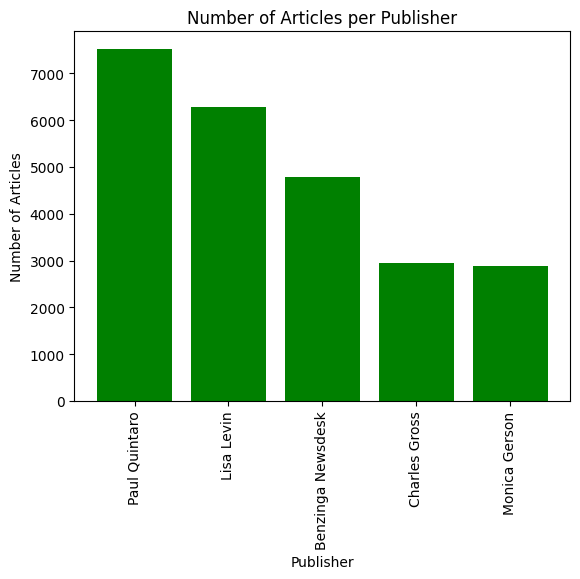

In [12]:
articles_per_publisher = data.groupby('publisher').size().reset_index(name='number_of_articles')
articles_per_publisher = articles_per_publisher.sort_values('number_of_articles', ascending=False)
top_5_publishers = articles_per_publisher.head(5)

# Creating  a bar chart

plt.bar(top_5_publishers['publisher'], top_5_publishers['number_of_articles'], color='green')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Publisher')
plt.xticks(rotation=90)  # Rotates X-axis labels; helpful if they're long
plt.show()

In [ ]:
articles_per_publisher.groupby()

In [13]:
#  publication dates
article_per_date=data.groupby('date').size()
print(article_per_date)

date
2011-07-22     1
2011-07-25     1
2011-07-27     1
2011-07-28     1
2011-08-01     1
              ..
2020-06-05    34
2020-06-07     2
2020-06-08    25
2020-06-09    19
2020-06-10    25
Length: 493, dtype: int64


In [14]:
article_per_date.describe()

count    493.000000
mean       2.900609
std        4.646909
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       34.000000
dtype: float64

In [15]:
# which date has the min article
date_with_least_articles = article_per_date.idxmin()
print(date_with_least_articles)

2011-07-22


In [16]:
# which date has the max article
date_with_most_articles = article_per_date.idxmax()
print(date_with_most_articles)

2020-06-05


### What happend on March 12 2020?
On March 12, 2020, there were significant events in the financial world that likely led to an increase in financial articles:

1. **Stock Market Crash**: The Dow Jones Industrial Average plunged 10% for its worst day since Black Monday in 1987. The 30-stock index fell 2,352 points — its largest point drop on record. Meanwhile, the S&P 500 plunged 9% to close in bear market territory, thus officially ending the bull market that began in 2009 during the throes of the financial crisis¹.

2. **Coronavirus Declared a Pandemic**: The World Health Organization (WHO) declared the novel coronavirus outbreak a pandemic on this day². This global health crisis had significant impacts on the economy and financial markets.

3. **Travel Restrictions Imposed**: President Donald Trump imposed a temporary suspension on foreign nationals from Europe traveling to the United States for 30 days beginning March 13, in a bid to contain the spread of the new pandemic². This decision had immediate and far-reaching effects on the global economy.

4. **Boeing's Financial Struggles**: The Boeing Company, a major player in the aviation industry, planned to draw the full amount of a $13.8 billion loan offered by a string of banks². This move was in response to the company's cash burn while it readied its 737 Max planes to hit the skies again².

These events likely contributed to the surge in financial articles on that day. I hope this information helps! Let me know if you have any other questions.

Source: Conversation with Bing, 4/30/2024
(1) Stock market live Thursday: Dow tanks 2,300 in worst day since Black .... https://www.cnbc.com/2020/03/12/stock-market-today-live.html.
(2) Stock Market News for Mar 12, 2020 | Nasdaq. https://www.nasdaq.com/articles/stock-market-news-for-mar-12-2020-2020-03-12.
(3) Stock Market News for Mar 12, 2020 - Yahoo Finance. https://finance.yahoo.com/news/stock-market-news-mar-12-140402219.html.

## Text Analysis(Sentiment analysis & Topic Modeling):

In [17]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [18]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [19]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text




In [20]:

data['headline_new'] = data['headline'].apply(preprocess_text)
data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,headline_new
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,stock hit 52-week high friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42,stock hit 52-week high wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29,71 biggest mover friday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44,46 stock moving friday 's mid-day session
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87,b security maintains neutral agilent technolog...
...,...,...,...,...,...,...,...,...
45226,45821,Keefe Bruyette &amp; Woods Initiates Coverage ...,https://www.benzinga.com/news/14/09/4817056/ke...,Paul Quintaro,NaN,AGO,105,keefe bruyette & amp ; wood initiate coverage ...
45227,45822,Assured Guaranty Ltd. Reports Q2 EPS of $0.56 ...,https://www.benzinga.com/news/earnings/14/08/4...,Eddie Staley,NaN,AGO,94,assured guaranty ltd. report q2 eps $ 0.56 v $...
45228,45823,"Earnings Scheduled For August 7, 2014",https://www.benzinga.com/news/earnings/14/08/4...,Monica Gerson,NaN,AGO,37,"earnings scheduled august 7 , 2014"
45229,45824,Top 4 Stocks In The Surety & Title Insurance I...,https://www.benzinga.com/trading-ideas/14/07/4...,Monica Gerson,NaN,AGO,79,top 4 stock surety & title insurance industry ...


In [28]:
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)

    # Check if the text is positive, neutral, or negative
    if scores['pos'] > scores['neg'] and scores['pos'] > scores['neu']:
        sentiment = 1  # Positive sentiment
    elif scores['neu'] > scores['pos'] and scores['neu'] > scores['neg']:
        sentiment = 0  # Neutral sentiment
    else:
        sentiment = -1  # Negative sentiment

    return sentiment


In [29]:
data['sentiment'] = data['headline_new'].apply(get_sentiment)

data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,headline_new,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,stock hit 52-week high friday,0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42,stock hit 52-week high wednesday,0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29,71 biggest mover friday,0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44,46 stock moving friday 's mid-day session,0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87,b security maintains neutral agilent technolog...,0
...,...,...,...,...,...,...,...,...,...
45226,45821,Keefe Bruyette &amp; Woods Initiates Coverage ...,https://www.benzinga.com/news/14/09/4817056/ke...,Paul Quintaro,NaN,AGO,105,keefe bruyette & amp ; wood initiate coverage ...,0
45227,45822,Assured Guaranty Ltd. Reports Q2 EPS of $0.56 ...,https://www.benzinga.com/news/earnings/14/08/4...,Eddie Staley,NaN,AGO,94,assured guaranty ltd. report q2 eps $ 0.56 v $...,0
45228,45823,"Earnings Scheduled For August 7, 2014",https://www.benzinga.com/news/earnings/14/08/4...,Monica Gerson,NaN,AGO,37,"earnings scheduled august 7 , 2014",0
45229,45824,Top 4 Stocks In The Surety & Title Insurance I...,https://www.benzinga.com/trading-ideas/14/07/4...,Monica Gerson,NaN,AGO,79,top 4 stock surety & title insurance industry ...,0


In [30]:
data.sentiment.unique()

array([ 0,  1, -1])

In [31]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Tokenize and lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

# Apply preprocessing to the text column
processed_docs = data['headline_new'].map(preprocess)

# Create a dictionary representation of the documents
dictionary = gensim.corpora.Dictionary(processed_docs)

# Filter out extremes to limit the number of keywords
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many words and how many times those words appear
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# Print the Keyword in the 10 topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))


Topic: 0 
Words: 0.108*"market" + 0.077*"stock" + 0.056*"aetna" + 0.053*"session" + 0.050*"moving" + 0.032*"mover" + 0.032*"update" + 0.030*"biggest" + 0.024*"morning" + 0.022*"tuesday"
Topic: 1 
Words: 0.052*"share" + 0.028*"option" + 0.026*"announces" + 0.019*"alert" + 0.018*"pharmaceutical" + 0.017*"financial" + 0.014*"american" + 0.014*"agreement" + 0.013*"silver" + 0.012*"update"
Topic: 2 
Words: 0.048*"allergan" + 0.034*"share" + 0.031*"trading" + 0.031*"company" + 0.020*"biotech" + 0.020*"higher" + 0.015*"daily" + 0.015*"drug" + 0.014*"pulse" + 0.014*"amid"
Topic: 3 
Words: 0.120*"report" + 0.090*"earnings" + 0.049*"revenue" + 0.045*"scheduled" + 0.025*"aflac" + 0.023*"sale" + 0.021*"accenture" + 0.019*"american" + 0.019*"agio" + 0.018*"jefferies"
Topic: 4 
Words: 0.040*"raise" + 0.040*"maintains" + 0.035*"american" + 0.033*"target" + 0.031*"bank" + 0.030*"price" + 0.024*"outperform" + 0.024*"update" + 0.021*"upgrade" + 0.021*"outfitter"
Topic: 5 
Words: 0.036*"allergan" + 0.034

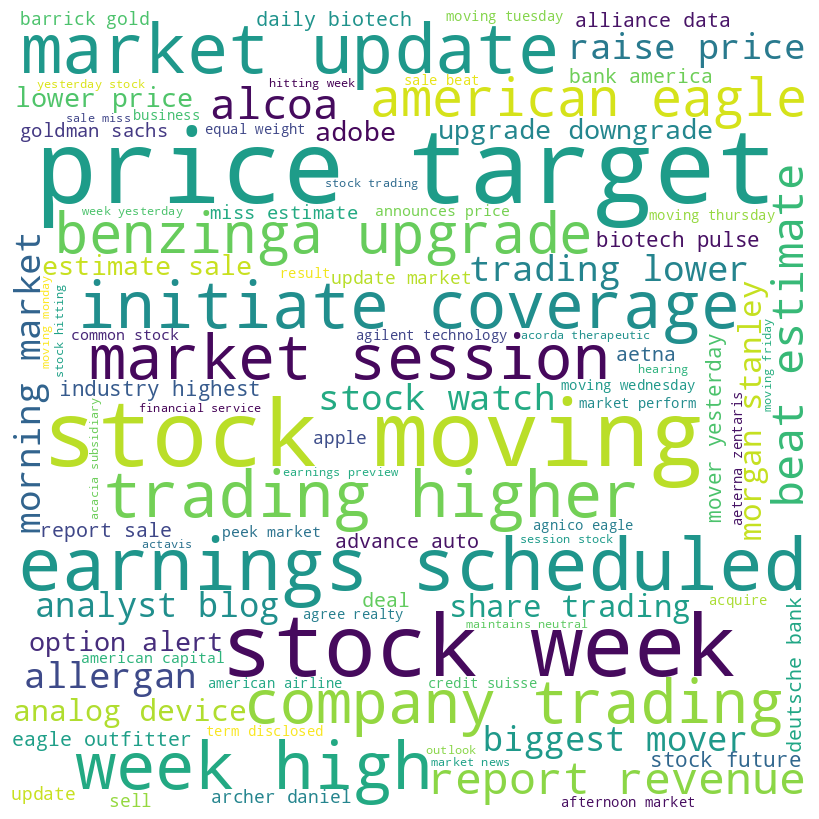

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


words = ' '.join([' '.join(doc) for doc in processed_docs])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(words)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [34]:
articles_per_publisher_category = data.groupby(['publisher', 'sentiment']).size().reset_index(name='number_of_articles')

# Now, 'articles_per_publisher_category' contains the number of articles for each combination of publisher and category.
articles_per_publisher_category.head()

,publisher,sentiment,number_of_articles
0,Aaron Levitt,0,2
1,Abe Raymond,-1,1
2,Abe Raymond,0,45
3,Abhi Rao,0,1
4,Abhi Rao,1,1


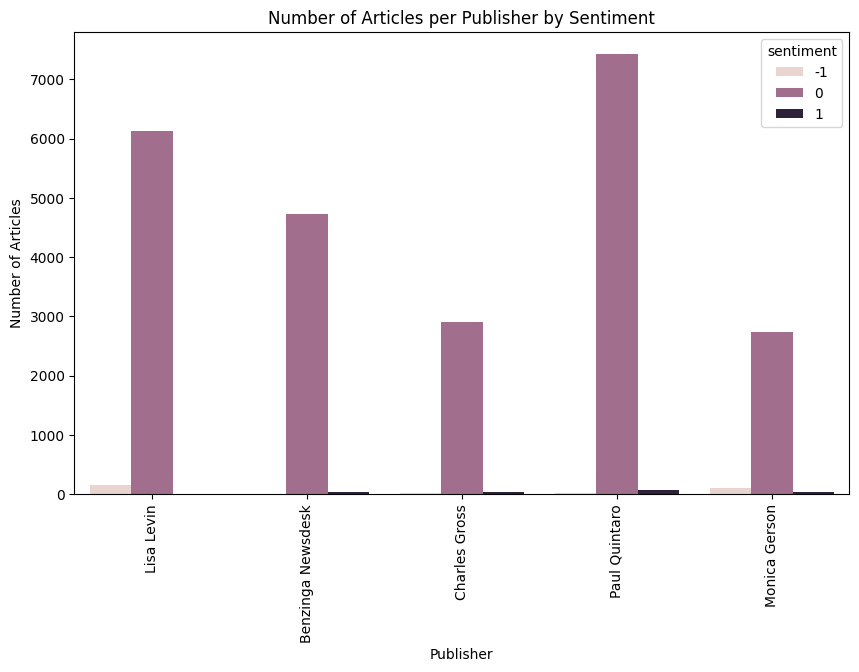

In [36]:
import seaborn as sns

# Get the top 5 publishers
top_5_publishers = data['publisher'].value_counts().index[:5]

# Filter your data for only the top 5 publishers
top_5_data = data[data['publisher'].isin(top_5_publishers)]

# Create a countplot to visualize the number of articles of each sentiment for each publisher
plt.figure(figsize=(10,6))
sns.countplot(x='publisher', hue='sentiment', data=top_5_data)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Publisher by Sentiment')
plt.xticks(rotation=90)  # Rotates X-axis labels; helpful if they're long
plt.show()


In [37]:
# email publisher names
data.publisher.unique()

array(['Benzinga Insights', 'Lisa Levin', 'Vick Meyer',
       'vishwanath@benzinga.com', 'Benzinga Newsdesk', 'Tyree Gorges',
       'Luke J Jacobi', 'Wayne Duggan', 'Shivdeep Dhaliwal',
       'luke@benzinga.com', 'Benzinga_Newsdesk', 'Spencer Israel',
       'Joel Elconin', 'Charles Gross', 'Tanzeel Akhtar',
       'Benzinga \u2009Newsdesk', 'Brett Hershman', 'Hal Lindon',
       'Shanthi Rexaline', 'Benzinga Newdesk', 'Javier Hasse',
       'Taylor Cox', 'Paul Quintaro', 'Eddie Staley',
       'Matt Hogan - Finbox.io', 'vivek.proactive@gmail.com',
       'Jayson Derrick', 'Zacks', 'Manikandan Raman',
       'Benzinga News Desk', 'R. Chandrasekaran', 'Monica Gerson',
       'Jim Swanson', 'Andrew Efimoff', 'Mike Butler', 'Prudena',
       'John Seward', 'Nicholas Donato', 'Garrett Cook', 'Shazir Mucklai',
       'Laura Brodbeck', 'Kevin Riley', 'Dwight Einhorn',
       'Louis Bedigian', 'Juan Lopez', 'MrTopStep', "Jake L'Ecuyer",
       'David Johnson', 'António Costa', 'Nelson Hem'

In [38]:
email_publishers = data[data['publisher'].str.contains('@')]

In [42]:
email_publishers.nunique()

Unnamed: 0         294
headline           263
url                265
publisher            5
date                24
stock               77
headline_length    112
headline_new       263
sentiment            2
dtype: int64

In [43]:
email_publishers.groupby('publisher').size()

publisher
bret.kenwell@benzinga.com     37
luke@benzinga.com            175
richa28dhand@gmail.com         1
vishwanath@benzinga.com       74
vivek.proactive@gmail.com      7
dtype: int64

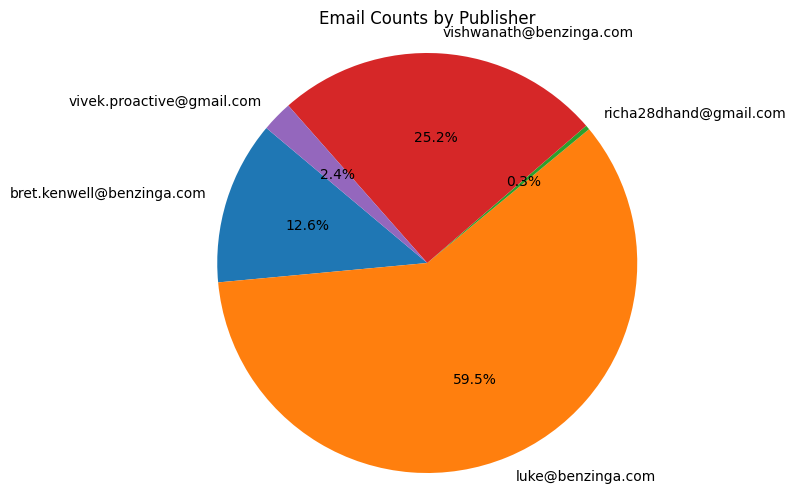

In [52]:
import matplotlib.pyplot as plt

# Data
publishers = ['bret.kenwell@benzinga.com', 'luke@benzinga.com', 'richa28dhand@gmail.com', 'vishwanath@benzinga.com', 'vivek.proactive@gmail.com']
counts = [37, 175, 1, 74, 7]

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=publishers, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Email Counts by Publisher')
plt.show()


In [ ]:
# saving the data as csv
sentiment_data=data.to_csv('/content/drive/MyDrive/DataSets/sentiment_data.csv', index=True)